In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv= datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
  oliv['data'].shape

(400, 4096)

In [5]:
oliv["images"].shape

(400, 64, 64)

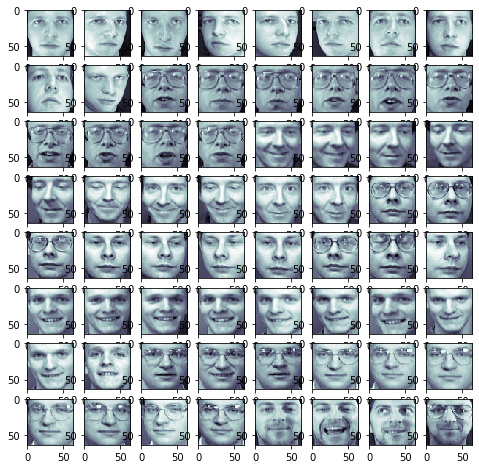

In [6]:
fig= plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()    


In [7]:
x = oliv.data
y = oliv.target

In [8]:
pca= PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.shape

(400, 4096)

In [10]:
k = 0
total = sum(pca.explained_variance_)
currentsum=0
while currentsum/total < 0.99:
    currentsum += pca.explained_variance_[k]
    k=k+1
print("No. of componetns needed " ,k)    

No. of componetns needed  260


In [11]:
pca = PCA(n_components=k)
transformed_data=pca.fit_transform(x)
transformed_data.shape
    

(400, 260)

In [12]:
x_approx= pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [13]:
x_approx_images = x_approx.reshape((400,64,64))

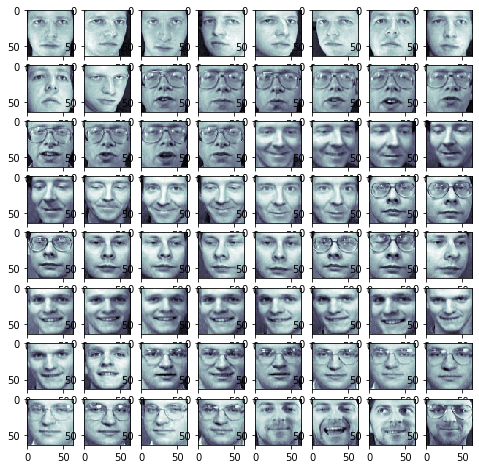

In [14]:
fig= plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()    ``````

In [17]:
eigen_vectors=pca.components_ 
eigen_vectors.shape

(260, 4096)

In [19]:
#reshape them to images
eigne_faces = eigen_vectors.reshape((260,64,64))

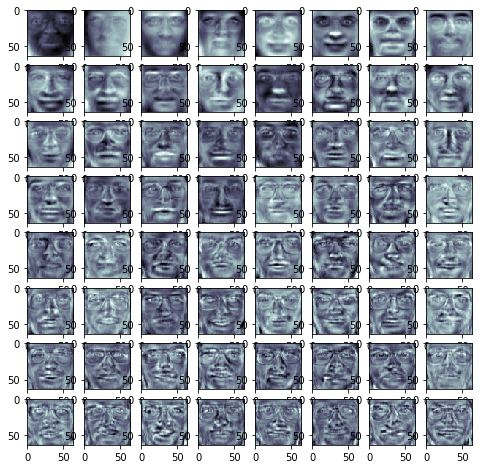

In [20]:
fig= plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigne_faces[i],cmap=plt.cm.bone)
plt.show()    